# Classification Challenge

Wine experts can identify wines from specific vineyards through smell and taste, but the factors that give different wines their individual charateristics are actually based on their chemical composition.

In this challenge, you must train a classification model to analyze the chemical and visual features of wine samples and classify them based on their cultivar (grape variety).

> **Citation**: The data used in this exercise was originally collected by Forina, M. et al.
>
> PARVUS - An Extendible Package for Data Exploration, Classification and Correlation.
Institute of Pharmaceutical and Food Analysis and Technologies, Via Brigata Salerno,
16147 Genoa, Italy.
>
> It can be downloaded from the UCI dataset repository (Dua, D. and Graff, C. (2019). [UCI Machine Learning Repository]([http://archive.ics.uci.edu/ml). Irvine, CA: University of California, School of Information and Computer Science). 

## Explore the data

Run the following cell to load a CSV file of wine data, which consists of 12 numeric features and a classification label with the following classes:

- **0** (*variety A*)
- **1** (*variety B*)
- **2** (*variety C*)

Your challenge is to explore the data and train a classification model that achieves an overall *Recall* metric of over 0.95 (95%).

> **Note**: There is no single "correct" solution. A sample solution is provided in [03 - Wine Classification Solution.ipynb](03%20-%20Wine%20Classification%20Solution.ipynb).

## Train and evaluate a model

Add markdown and code cells as required to to explore the data, train a model, and evaluate the model's predictive performance.

In [408]:
import pandas as pd

# load the training dataset
data = pd.read_csv('data/wine.csv')
data.sample(10)

,Alcohol,Malic_acid,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color_intensity,Hue,OD280_315_of_diluted_wines,Proline,WineVariety
77,11.84,2.89,2.23,18.0,112,1.72,1.32,0.43,0.95,2.65,0.96,2.52,500,1
91,12.00,1.51,2.42,22.0,86,1.45,1.25,0.50,1.63,3.60,1.05,2.65,450,1
155,13.17,5.19,2.32,22.0,93,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725,2
95,12.47,1.52,2.20,19.0,162,2.50,2.27,0.32,3.28,2.60,1.16,2.63,937,1
138,13.49,3.59,2.19,19.5,88,1.62,0.48,0.58,0.88,5.70,0.81,1.82,580,2
168,13.58,2.58,2.69,24.5,105,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750,2
37,13.05,1.65,2.55,18.0,98,2.45,2.43,0.29,1.44,4.25,1.12,2.51,1105,0
122,12.42,4.43,2.73,26.5,102,2.20,2.13,0.43,1.71,2.08,0.92,3.12,365,1
139,12.84,2.96,2.61,24.0,101,2.32,0.60,0.53,0.81,4.92,0.89,2.15,590,2
150,13.50,3.12,2.62,24.0,123,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500,2


In [409]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

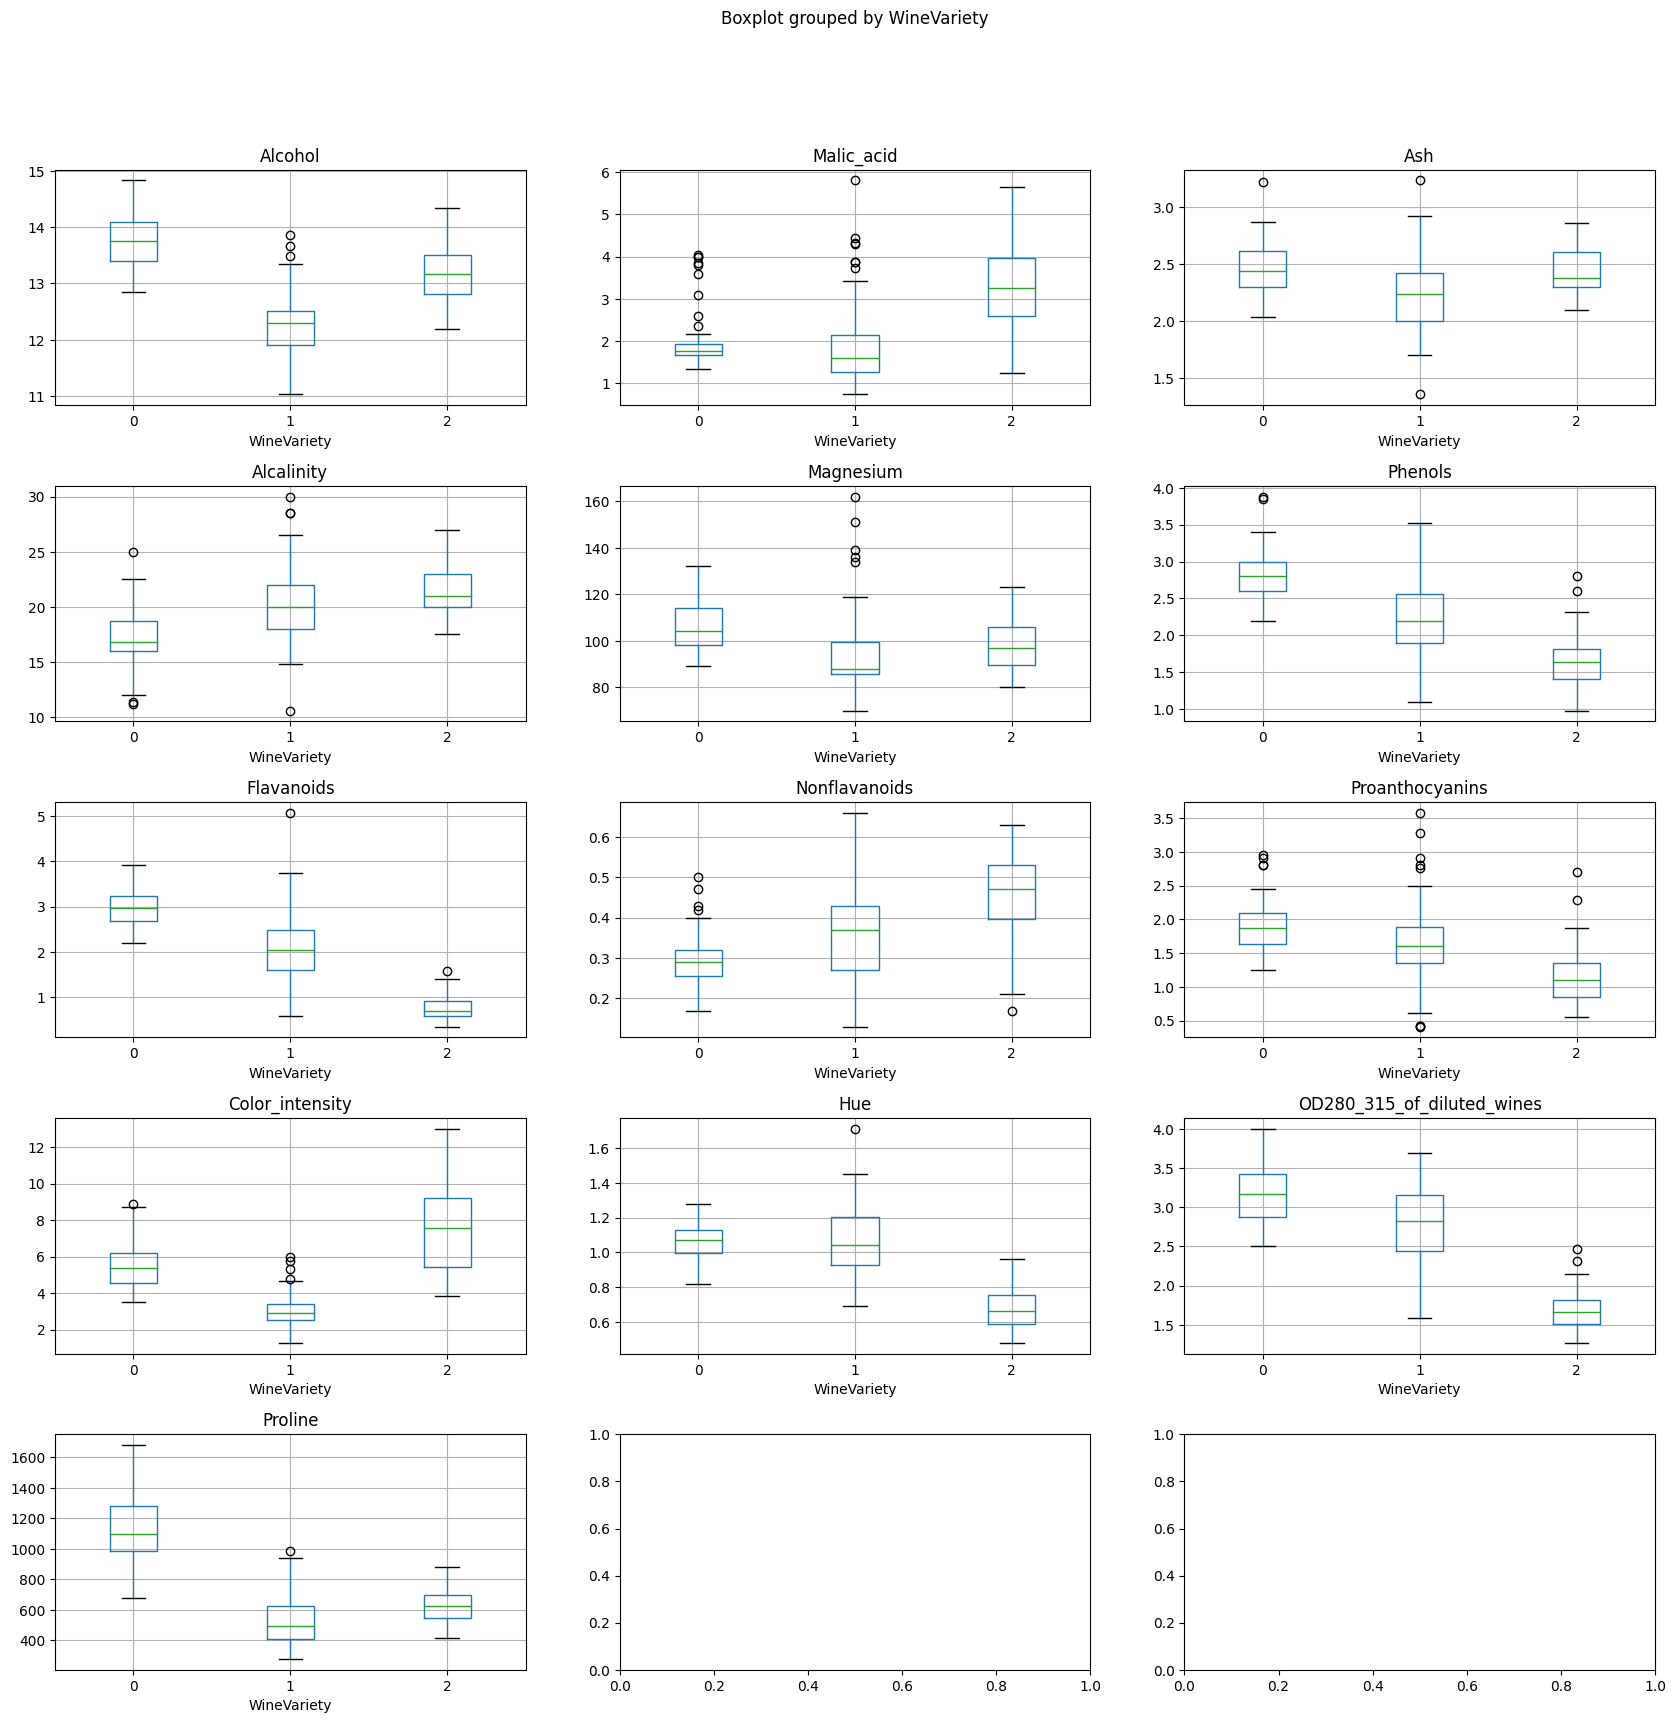

In [410]:
# Your code to evaluate data, and train and evaluate a classification model

columns = ['Alcohol','Malic_acid','Ash','Alcalinity','Magnesium','Phenols','Flavanoids','Nonflavanoids','Proanthocyanins','Color_intensity','Hue','OD280_315_of_diluted_wines','Proline']

fig, ax = plt.subplots(nrows = 5, ncols = 3, figsize=(20, 20))
fig.tight_layout(pad=5)

for y, c in enumerate(columns):
    i, j = divmod(y, 3)
    data.boxplot(column=c, by='WineVariety', ax=ax[i,j])



In [411]:
data.isnull().sum()

Alcohol                       0
Malic_acid                    0
Ash                           0
Alcalinity                    0
Magnesium                     0
Phenols                       0
Flavanoids                    0
Nonflavanoids                 0
Proanthocyanins               0
Color_intensity               0
Hue                           0
OD280_315_of_diluted_wines    0
Proline                       0
WineVariety                   0
dtype: int64

In [412]:
features = data[columns].copy()
labels = data.WineVariety.copy()


In [413]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression

In [414]:
print('Data shape: ', data.shape)

X_train, x_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, shuffle=True, stratify=labels)
print('X_train: ', X_train.shape)
print('x_test: ', x_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)


Data shape:  (178, 14)
X_train:  (124, 13)
x_test:  (54, 13)
y_train:  (124,)
y_test:  (54,)


In [415]:
from sklearn.preprocessing import StandardScaler

X_train = StandardScaler().fit(X_train).transform(X_train)
x_test = StandardScaler().fit(x_test).transform(x_test)

In [416]:
rate = 0.1
model = LogisticRegression(penalty='none', random_state=0, verbose=1, max_iter=10000).fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


In [417]:
predictions = model.predict(x_test)
acc = accuracy_score(y_test, predictions)
print(acc)

1.0


In [418]:
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)

[[18  0  0]
 [ 0 21  0]
 [ 0  0 15]]


Text(0, 0.5, 'y_test')

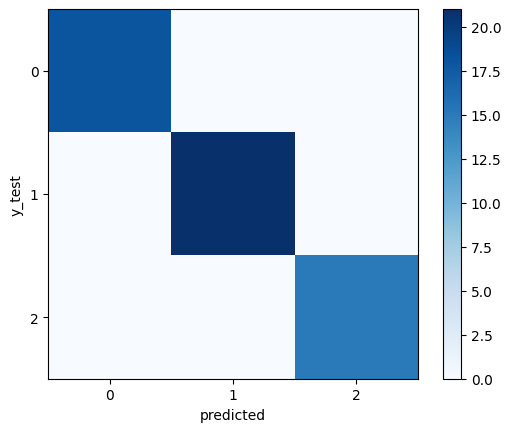

In [419]:
plt.imshow(conf_matrix, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
ticks_mark = np.arange(len(data.WineVariety.unique()))
plt.xticks(ticks_mark, data.WineVariety.unique())
plt.yticks(ticks_mark, data.WineVariety.unique())
plt.xlabel('predicted')
plt.ylabel('y_test')

In [420]:
import joblib

save = joblib.dump(model, './wine.model.pkl')

## Use the model with new data observation

When you're happy with your model's predictive performance, save it and then use it to predict classes for the following two new wine samples:

- \[13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285\]
- \[12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520\]


In [428]:
# Your code to predict classes for the two new samples

x_new = pd.DataFrame([
    [13.72,1.43,2.5,16.7,108,3.4,3.67,0.19,2.04,6.8,0.89,2.87,1285],
    [12.37,0.94,1.36,10.6,88,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520],
    [14.12,4.0,2.75,24.6,95,2.07,1.80,0.57,1.33,9.1,0.65,1.7,570]
])

x_new = StandardScaler().fit(x_new).transform(x_new)

model = joblib.load('./wine.model.pkl')

prediction = model.predict(x_new)
print(prediction)

[0 1 2]
